# Proyecto 2: Análisis Exploratorio
### Tema 12: Google - American Sign Language Fingerspelling Recognition
<div align="center">
<img src=./data/image.png alt="Sign Language Fingerspelling Recognition" width="600"/>
</div>

**Integrantes:**
- Derek Fabian Arreaga Kelson | 22537
- Mónica Alejandra Salvatierra Chacón | 22249
- Sofía Mishell Velásquez Mérida | 22049
- Paula Rebeca Barillas Alvarez | 22764

## Librerías principales para análisis de datos y visualización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Lectura de los datos principales

In [2]:
train = pd.read_csv('./data/train.csv')
metadata = pd.read_csv('./data/supplemental_metadata.csv')
import json
with open('./data/character_to_prediction_index.json', 'r') as f:
    char_map = json.load(f)

## Tipo de datos del dataset

In [3]:
print('Dimensiones del dataset:', train.shape)
print('\nTipos de datos:')
print(train.dtypes)
print('\nPrimeras filas:')
display(train.head())

Dimensiones del dataset: (67208, 5)

Tipos de datos:
path              object
file_id            int64
sequence_id        int64
participant_id     int64
phrase            object
dtype: object

Primeras filas:


,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


## Variables numéricas

In [4]:
# variables numéricas
train.describe().T

,count,mean,std,min,25%,50%,75%,max
file_id,67208.0,1.094448e+09,6.395616e+08,5414471.0,5.277082e+08,1.099408e+09,1.662743e+09,2.118949e+09
sequence_id,67208.0,1.072696e+09,6.177372e+08,71095.0,5.376519e+08,1.074387e+09,1.605592e+09,2.147465e+09
participant_id,67208.0,1.197582e+02,7.433047e+01,0.0,6.300000e+01,1.130000e+02,1.780000e+02,2.540000e+02


## Tablas de frecuencia para variables categóricas

In [5]:
cat_cols = ['participant_id', 'file_id', 'sequence_id', 'phrase']
for col in cat_cols:
    print(f'\nFrecuencia de valores en {col}:')
    print(train[col].value_counts().head(10))


Frecuencia de valores en participant_id:
participant_id
36     1535
105    1006
112     953
81      944
89      896
188     895
56      890
141     886
178     886
2       885
Name: count, dtype: int64

Frecuencia de valores en file_id:
file_id
5414471       1000
527708222     1000
2072296290    1000
2026717426    1000
1969985709    1000
1726141437    1000
1664666588    1000
1662742697    1000
1552432300    1000
1448136004    1000
Name: count, dtype: int64

Frecuencia de valores en sequence_id:
sequence_id
1816796431    1
1039543535    1
1039712283    1
1039732808    1
1039813809    1
1039817296    1
1039876540    1
1039913449    1
1039914489    1
1039941259    1
Name: count, dtype: int64

Frecuencia de valores en phrase:
phrase
surprise az                        17
fort worth tx                      16
yonkers new york                   16
raleigh north carolina             15
buffalo ny                         14
north charleston south carolina    13
alexandria virginia             

## Análisis de variables categóricas con tablas y gráficos apropiados.


>>> participant_id <<<
participant_id
36     1535
105    1006
112     953
81      944
89      896
188     895
56      890
141     886
178     886
2       885
Name: count, dtype: int64
Niveles únicos: 94

>>> file_id <<<
file_id
5414471       1000
527708222     1000
2072296290    1000
2026717426    1000
1969985709    1000
1726141437    1000
1664666588    1000
1662742697    1000
1552432300    1000
1448136004    1000
Name: count, dtype: int64
Niveles únicos: 68

>>> phrase_type <<<
phrase_type
mixed           37965
phone_like       8746
word             8347
url              7074
address_like     5076
Name: count, dtype: int64
Niveles únicos: 5

>>> len_bin <<<
len_bin
11-20    42446
21-40    21771
6-10      2892
0-5         99
>40          0
Name: count, dtype: int64
Niveles únicos: 4

>>> phrase <<<
phrase
surprise az                        17
fort worth tx                      16
yonkers new york                   16
raleigh north carolina             15
buffalo ny                    

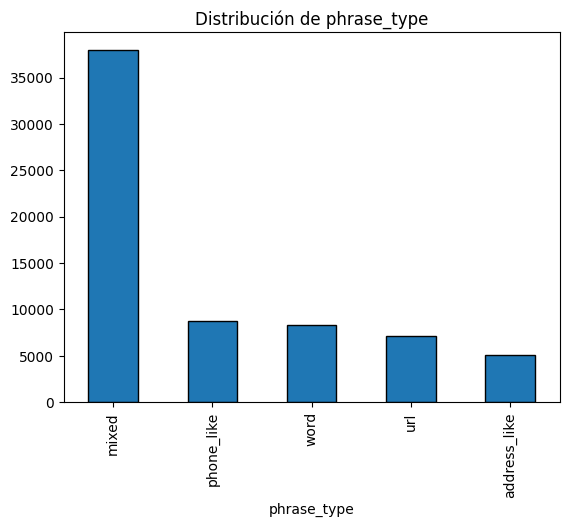

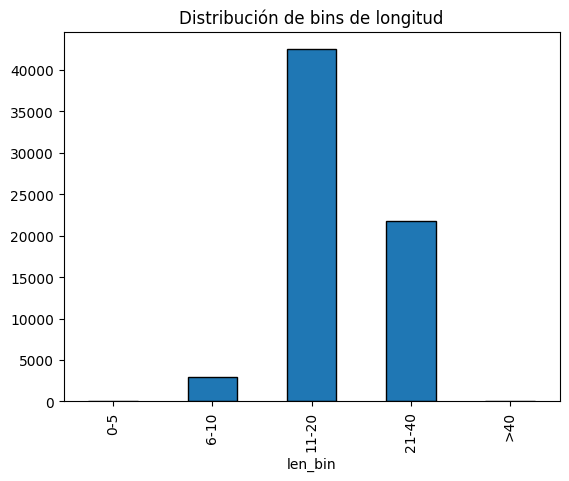

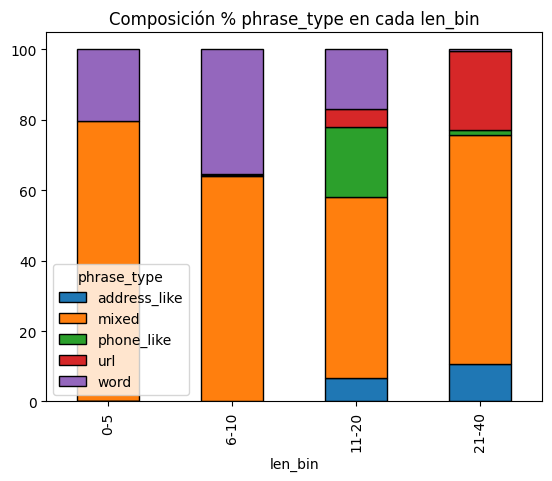

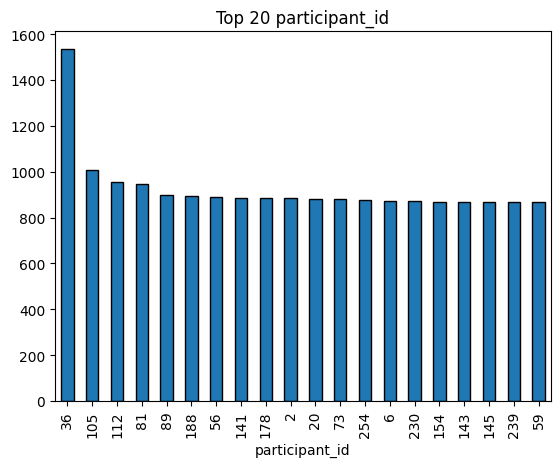

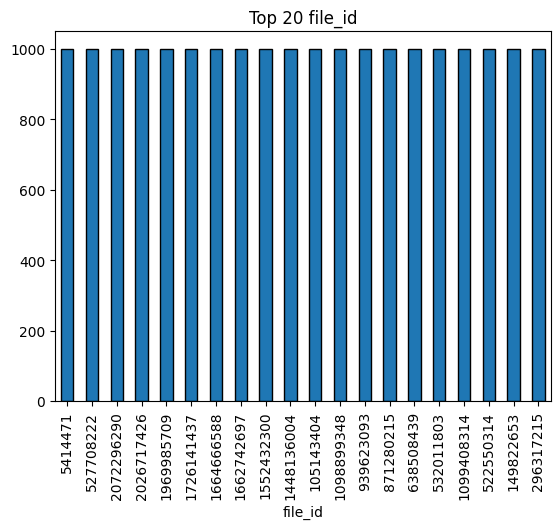

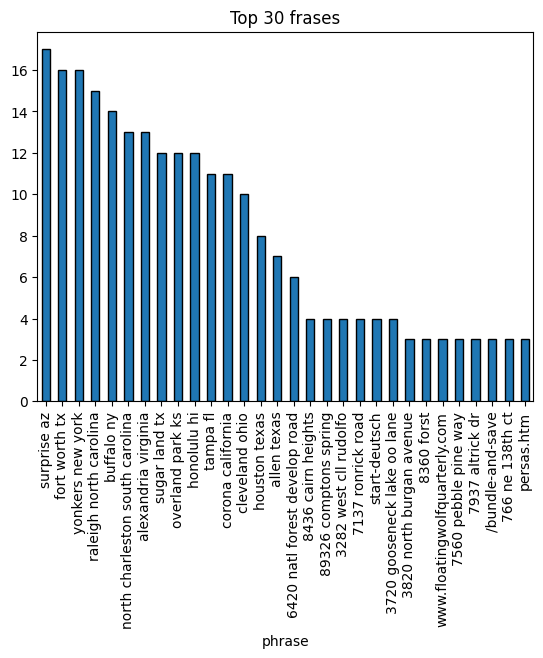

In [ ]:
import re
import json
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
from scipy.stats import chi2_contingency

# ========= Feature engineering sobre 'phrase' =========
def phrase_type(s: str) -> str:
    if pd.isna(s) or s == "":
        return "NA"
    s2 = str(s)
    if re.search(r"(http|www\.)", s2, flags=re.I):
        return "url"
    if re.search(r"\d{3}[-\s.]?\d{3}[-\s.]?\d{4}", s2):           
        return "phone_like"
    if re.search(r"\d", s2) and re.search(r"[A-Za-z]", s2) and re.search(r"\b(st|ave|rd|blvd|dr|ln|lane|road)\b", s2, flags=re.I):
        return "address_like"
    if re.fullmatch(r"[A-Za-z]+(?:\s+[A-Za-z]+)*", s2):
        return "word"
    return "mixed"

train["phrase_len"] = train["phrase"].astype(str).str.len()
train["num_alpha"]  = train["phrase"].fillna("").apply(lambda x: sum(ch.isalpha() for ch in str(x)))
train["num_digits"] = train["phrase"].fillna("").apply(lambda x: sum(ch.isdigit() for ch in str(x)))
train["num_symbols"]= train["phrase"].fillna("").apply(lambda x: sum(not ch.isalnum() and not ch.isspace() for ch in str(x)))
train["phrase_type"]= train["phrase"].apply(phrase_type)

bins = [0,5,10,20,40,1_000]
labels = ["0-5","6-10","11-20","21-40",">40"]
train["len_bin"] = pd.cut(train["phrase_len"], bins=bins, labels=labels, right=True, include_lowest=True)

# ========= Resumen de variables categóricas =========
cat_cols = ["participant_id", "file_id", "phrase_type", "len_bin", "phrase"]
for c in cat_cols:
    if c in train:
        print(f"\n>>> {c} <<<")
        print(train[c].value_counts().head(10))
        print("Niveles únicos:", train[c].nunique())

# ========= Tablas de contingencia =========
if "len_bin" in train and "phrase_type" in train:
    ct = pd.crosstab(train["len_bin"], train["phrase_type"])
    print("\nTabla len_bin x phrase_type:\n", ct)
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Chi²={chi2:.2f}, p={p:.4g}, dof={dof}")

# ========= Gráficos exploratorios =========
# A) Distribución de phrase_type
train["phrase_type"].value_counts().plot(kind="bar", edgecolor="black", title="Distribución de phrase_type")
plt.show()

# B) Distribución de len_bin
train["len_bin"].value_counts().sort_index().plot(kind="bar", edgecolor="black", title="Distribución de bins de longitud")
plt.show()

# C) Composición % por phrase_type dentro de cada len_bin
ct_pct = pd.crosstab(train["len_bin"], train["phrase_type"])
ct_pct = ct_pct.div(ct_pct.sum(axis=1), axis=0) * 100
ct_pct.plot(kind="bar", stacked=True, edgecolor="black", title="Composición % phrase_type en cada len_bin")
plt.show()

# D) Top-20 participant_id
train["participant_id"].value_counts().head(20).plot(kind="bar", edgecolor="black", title="Top 20 participant_id")
plt.show()

# F) Top-30 frases
train["phrase"].value_counts().head(30).plot(kind="bar", edgecolor="black", title="Top 30 frases", rot=90)
plt.show()


## Cruces entre variables clave para detectar patrones relevantes